In [179]:
import numpy as np
import cv2 as cv
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt
from scipy.signal import find_peaks, argrelmin

# Heart Rate Measurment Using Mobile Phone Camara

In [201]:
# Step 1 - Signal Diff
path = glob.glob("./images_rgb/*.jpg")
cv_img = []
frame_rate = 60

for img in tqdm(path):
    n = cv.imread(img, 0)
    img_array = cv.resize(n, (320, 240))
    ##img_array = cv.cvtColor(img_array, cv.COLOR_BGR2GRAY)
    cv_img.append(img_array)
    grayscale_imgs = np.asarray(cv_img)

100%|██████████| 100/100 [00:01<00:00, 52.99it/s]


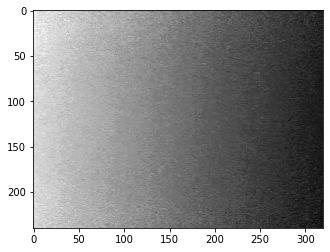

Grayscale image shape: (100, 240, 320)


In [214]:
plt.imshow(grayscale_imgs[0], cmap = plt.cm.gray )
plt.show()
print(f'Grayscale image shape: {grayscale_imgs.shape}')

In [224]:
avg_red = []
for i in range(grayscale_imgs.shape[0] - 100):
    avg_red.append(int(abs(np.mean(grayscale_imgs[i] - grayscale_imgs[i + 1]))))
    red = np.asarray(avg_red)

In [225]:
red

array([107, 109,  41,  78, 163, 104,  80, 130,  93,  66,  80, 158,  82,
        51, 129, 119, 118, 136,  27,  51, 191,  56,  88, 147,  30, 170,
       181,  37, 173,  60,  48,  74, 180, 135,  40,  52, 145, 128,  86,
        65,  58, 186,  81,  86, 136, 101,  43,  85, 171,  27, 192,   6,
        76, 237,  35, 181,   8, 152, 128,  25, 227,   7, 155,  82,  22,
        83, 131,  96,  51, 113, 118, 188,  83,  30,  44, 242,  30, 109,
        91,  82, 184,  27, 116, 108,  92, 101,  71, 130,  95,  83, 112,
        84, 113, 120,  72,  98,  98,  83, 128])

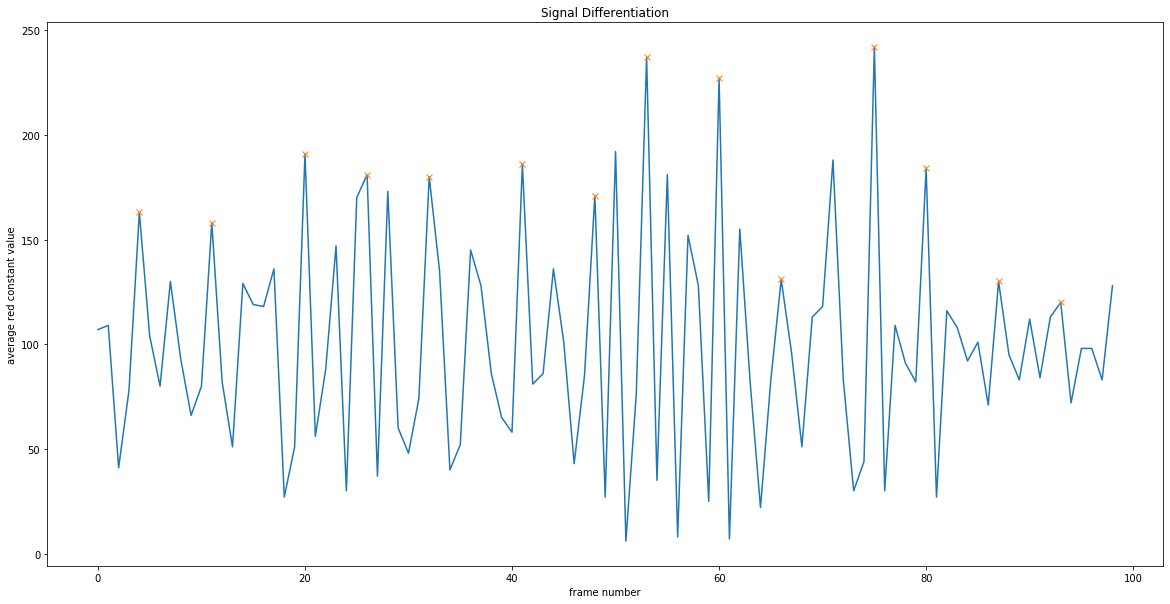

In [226]:
plt.figure(figsize=(20,10))
plt.title("Signal Differentiation")
plt.ylabel("average red constant value")
plt.xlabel("frame number")
plt.plot(red[:100])
plt.plot(peaks[:100], red[peaks[:100]], "x")
plt.show()

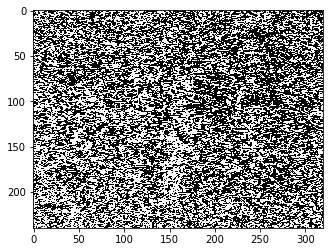

In [239]:
plt.imshow(grayscale_imgs[70] - grayscale_imgs[71], cmap = plt.cm.gray)
plt.show()

In [228]:
peaks, _ = find_peaks(red, distance=5)
print(f'Peaks: {peaks}')

[ 4 11 20 26 32 41 48 53 60 66 75 80 87 93]


In [230]:
dist = []
variance = []
for i in range(len(peaks) - 1):
    dist.append(peaks[i + 1] - peaks[i])
    distances = np.asarray(dist)
    variance.append(abs(np.square(abs(distances[i] - np.mean(distances)))))
    variances = np.asarray(variance)

In [231]:
print(distances)
print(variances)

[7 9 6 6 9 7 5 7 6 9 5 7 6]
[0.         1.         1.77777778 1.         2.56       0.11111111
 4.         0.         0.79012346 3.61       3.6446281  0.00694444
 0.71597633]


In [233]:
minima = argrelmin(variances)
print(minima)
minima_mean = np.mean(minima)
print(minima_mean)

(array([ 3,  5,  7, 11]),)
6.5


In [238]:
heartrate = frame_rate * 60 / minima_mean
print(f'Heart rate in bpm: {heartrate}')

Heart rate in bpm: 553.8461538461538
